IMPORTING LIBRARIES

In [31]:
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING THE CSV FILE

In [32]:
file = pd.read_csv('housing.csv')
file

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,House Price
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


DATA WRANGLING

In [33]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   House Price         20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [34]:
file.shape

(20640, 9)

In [35]:
file.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
House Price             0
dtype: int64

IMPLEMENTATION OF LINEAR REGRESSION

In [36]:
file = file.dropna()
file.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   House Price         20433 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.6 MB


In [37]:
file = file.drop_duplicates()
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   House Price         20433 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.6 MB


In [38]:
X_label = file[['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'longitude', 'latitude', 'housing_median_age']]
Y_label = file[['House Price']]

<AxesSubplot:>

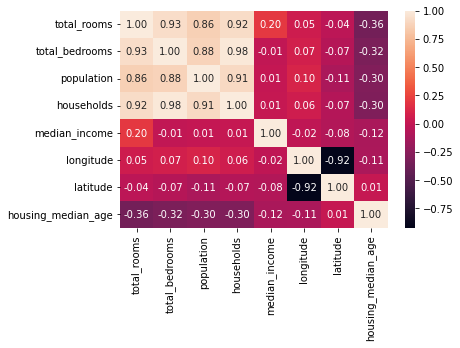

In [39]:
corCheck = sns.heatmap(X_label.corr(), annot=True, fmt='.2f')
corCheck

<AxesSubplot:>

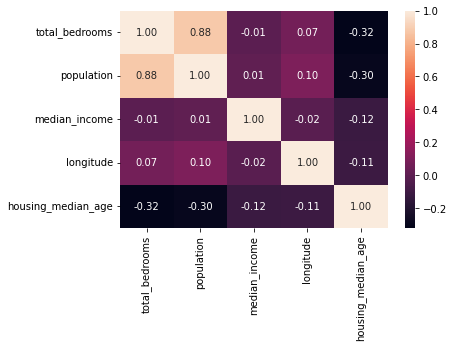

In [40]:
#drop the columns that are highly correlated and picking only those which are not highly correlated
#longitude, households, total_rooms have been dropped

X_label = file[['total_bedrooms', 'population', 'median_income', 'longitude', 'housing_median_age']]
corCheck = sns.heatmap(X_label.corr(), annot=True, fmt='.2f')
corCheck


Normalize the data

In [43]:
#
X_label = (X_label-X_label.mean())/(X_label).std()
Y_label = (Y_label-Y_label.mean())/(Y_label).std()

Splitting the data on the basis of training and testing

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_label,Y_label,test_size = 0.3,random_state=0)

Making Linear Regression

In [57]:
def CostFunction(x,y,weight,bias):
 cost = np.sum((((x.dot(weight) + bias) - y) ** 2) / (2*len(y)))
 return cost

In [66]:
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b

In [ ]:
x = np.zeros(x_train.shape[1])

w,b = GradientDescent(x_train,y_train,x,0,0.001,12000)


In [51]:
def predict(X, weight, bias):
 return X.dot(weight) + bias

In [70]:

df = pd.DataFrame({'Actual':Y_label, 'Predicted':y_test})
df

Actual   Predicted
0 245800 183027.332440
1 137900 183707.623821
2 218200 199572.293801
3 220800 174337.571162
4 170500 180886.022978
... ... ...
6125 287700 300322.268832
6126 241900 206354.479478
6127 88400 162859.101086
6128 77500 31995.855512
6129 72900 114814.385297
[6130 rows x 2 columns]
